In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                          title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                     Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23           6988        219  1.0              
devansodariya/student-performance-data                       Student Performance Dataset                           7KB  2022-05-26 13:55:09           3002        125  0.9705882        
iamsouravbanerjee/software-professional-salaries-2022        Salary Dataset - 2022                               526KB  2022-06-10 06:02:59           1081         34

In [ ]:
! kaggle datasets download -d cdeotte/jpeg-melanoma-256x256

 98% 773M/791M [00:05<00:00, 212MB/s]
100% 791M/791M [00:05<00:00, 144MB/s]


In [ ]:
! mkdir dataset1
! unzip jpeg-melanoma-256x256.zip -d dataset1

Streaming output truncated to the last 5000 lines.
  inflating: dataset1/train/ISIC_8512716.jpg  
  inflating: dataset1/train/ISIC_8513112.jpg  
  inflating: dataset1/train/ISIC_8513649.jpg  
  inflating: dataset1/train/ISIC_8514170.jpg  
  inflating: dataset1/train/ISIC_8514989.jpg  
  inflating: dataset1/train/ISIC_8515165.jpg  
  inflating: dataset1/train/ISIC_8515281.jpg  
  inflating: dataset1/train/ISIC_8515582.jpg  
  inflating: dataset1/train/ISIC_8515674.jpg  
  inflating: dataset1/train/ISIC_8516181.jpg  
  inflating: dataset1/train/ISIC_8516223.jpg  
  inflating: dataset1/train/ISIC_8516516.jpg  
  inflating: dataset1/train/ISIC_8516631.jpg  
  inflating: dataset1/train/ISIC_8516659.jpg  
  inflating: dataset1/train/ISIC_8516922.jpg  
  inflating: dataset1/train/ISIC_8517305.jpg  
  inflating: dataset1/train/ISIC_8517492.jpg  
  inflating: dataset1/train/ISIC_8518406.jpg  
  inflating: dataset1/train/ISIC_8519222.jpg  
  inflating: dataset1/train/ISIC_8519402.jpg  
  inflati

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train= pd.read_csv("/content/dataset1/train.csv")
test = pd.read_csv("/content/dataset1/test.csv")
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)

In [ ]:
train_df.head()   # target column is 0 for begnin and 1 for malignant in benign_malignant coulumn

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000


In [ ]:
test_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,width,height
0,ISIC_0052060,IP_3579794,male,70.0,NaN,6000,4000
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,6000,4000
2,ISIC_0058510,IP_7960270,female,55.0,torso,6000,4000
3,ISIC_0073313,IP_6375035,female,50.0,torso,6000,4000
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,1920,1080


In [ ]:
print("#Training images",train.shape[0])
print("#Testing images",test.shape[0])

#Training images 33126
#Testing images 10982


In [ ]:
# Some patients are diagonised with multiple marks, that's mean there is several images for the same patient
print("#patients in trainset",len(train["patient_id"].unique()))
# Same idea in testset
print("#patients in testset",len(test["patient_id"].unique()))

#patients in trainset 2056
#patients in testset 690


In [ ]:
# find NaN values in each column in train set to process it later
train.isna().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
tfrecord                           0
width                              0
height                             0
dtype: int64

In [ ]:
# find NaN values in each column in test set to process it later
test.isna().sum()

image_name                         0
patient_id                         0
sex                                0
age_approx                         0
anatom_site_general_challenge    351
width                              0
height                             0
dtype: int64

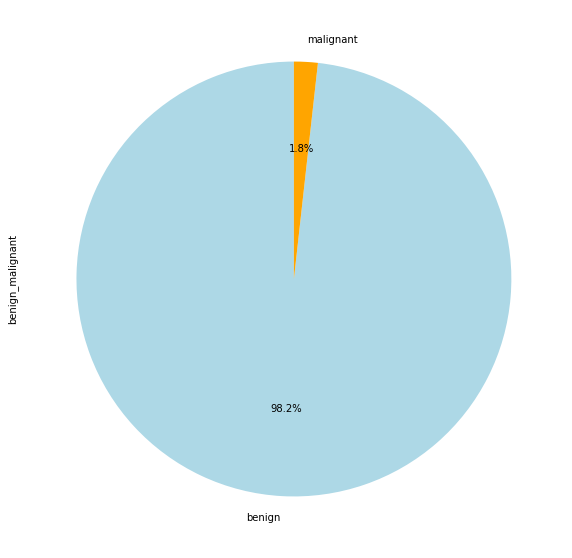

In [ ]:
train["benign_malignant"].value_counts().plot(kind='pie',figsize=(10,10),autopct="%1.1f%%",startangle = 90, colors =["lightblue", "orange"] )
# It's clear that there is unbalance between the 2 classes

Text(0.5, 1.0, 'Begnin Male & Female')

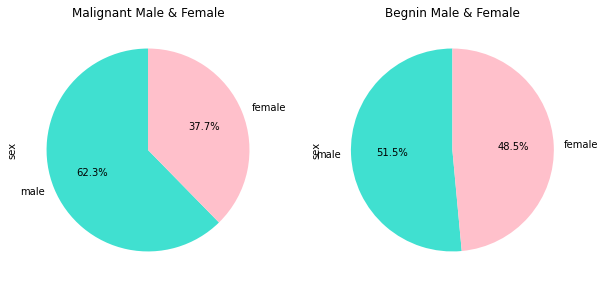

In [ ]:
train_malignant  = train[train["target"] == 1]
plt.subplot(1,2,1)
train_malignant["sex"].value_counts().plot(kind='pie',figsize=(10,10),autopct="%1.1f%%",startangle = 90, colors =["turquoise", "pink"] )
plt.title("Malignant Male & Female")
train_begnin  = train[train["target"] == 0]
plt.subplot(1,2,2)
train_begnin["sex"].value_counts().plot(kind='pie',figsize=(10,10),autopct="%1.1f%%",startangle = 90, colors =["turquoise", "pink"] )
plt.title("Begnin Male & Female")
# we can notice that there is a balance between Male and Female in Begnin cases, and a slightly difference in the ratio in Malignant cases

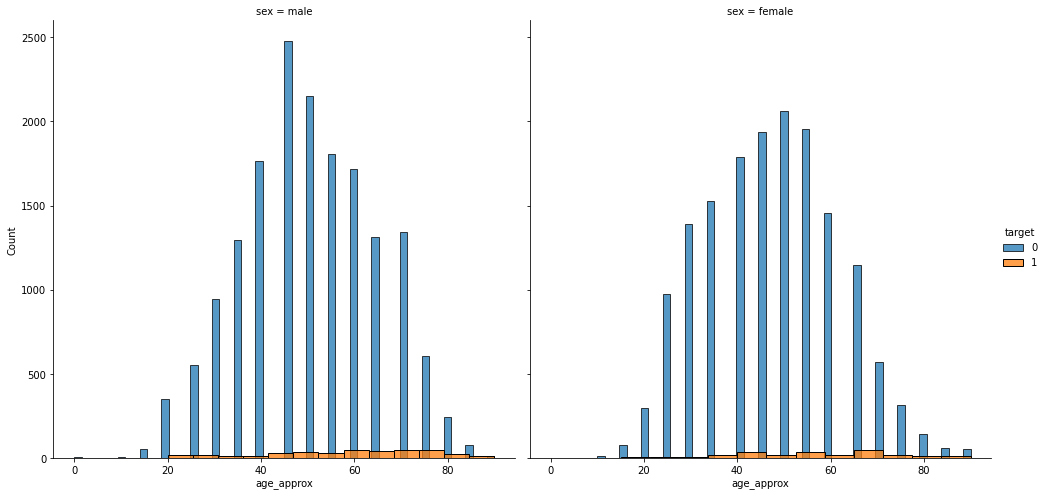

In [ ]:
g = sns.FacetGrid(train, col="sex", hue="target",height=7)
g.map(sns.histplot, "age_approx")
g.add_legend()
# The malignant cases belong to relatively higher age group for male and female.

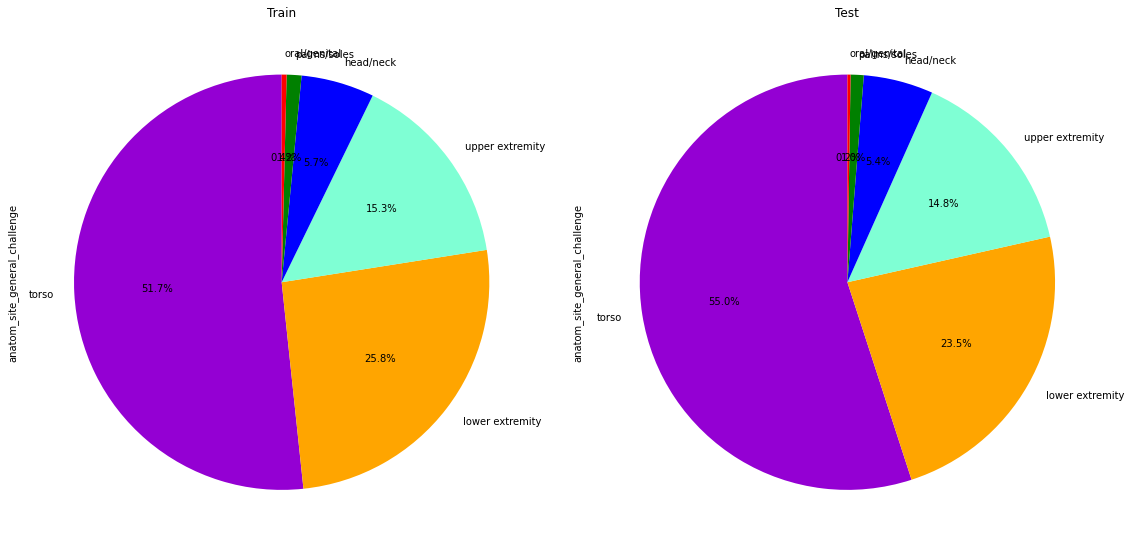

In [ ]:
plt.subplot(1,2,1)
train["anatom_site_general_challenge"].value_counts().plot(kind='pie',figsize=(16,16),autopct="%1.1f%%",startangle = 90, colors =["darkviolet", "orange", 'aquamarine', 'b', 'g', 'r'] )
plt.title ("Train")
plt.subplot(1,2,2)
test["anatom_site_general_challenge"].value_counts().plot(kind='pie',figsize=(16,16),autopct="%1.1f%%",startangle = 90, colors =["darkviolet", "orange", 'aquamarine', 'b', 'g', 'r'] )
plt.title ("Test")
plt.tight_layout()
# we can notice that anatom_site_general_challenge ratios are same in train and test and the dominant site is torso then lower extremity then upper extremity

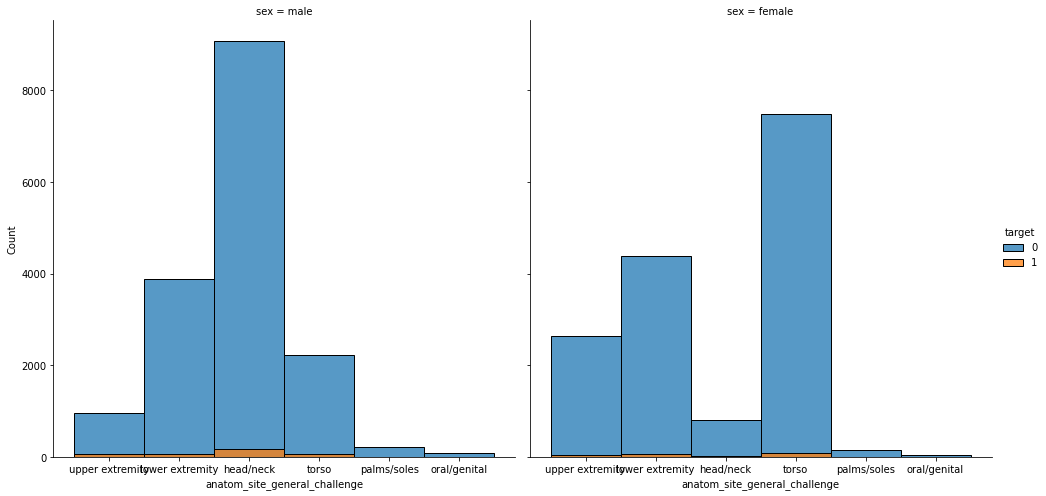

In [ ]:
g1 = sns.FacetGrid(train, col="sex", hue="target",height=7)
g1.map(sns.histplot, "anatom_site_general_challenge")
g1.add_legend()
# here we can notice that most malignant cases are observed at the torso for female and head/neck for male
# there is almost no malignant case at palms/soles and oral/gentile for both male and female.

Malignant_diagnosis
melanoma    584
Name: diagnosis, dtype: int64
Begnin_diagnosis
unknown                               27124
nevus                                  5193
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: diagnosis, dtype: int64


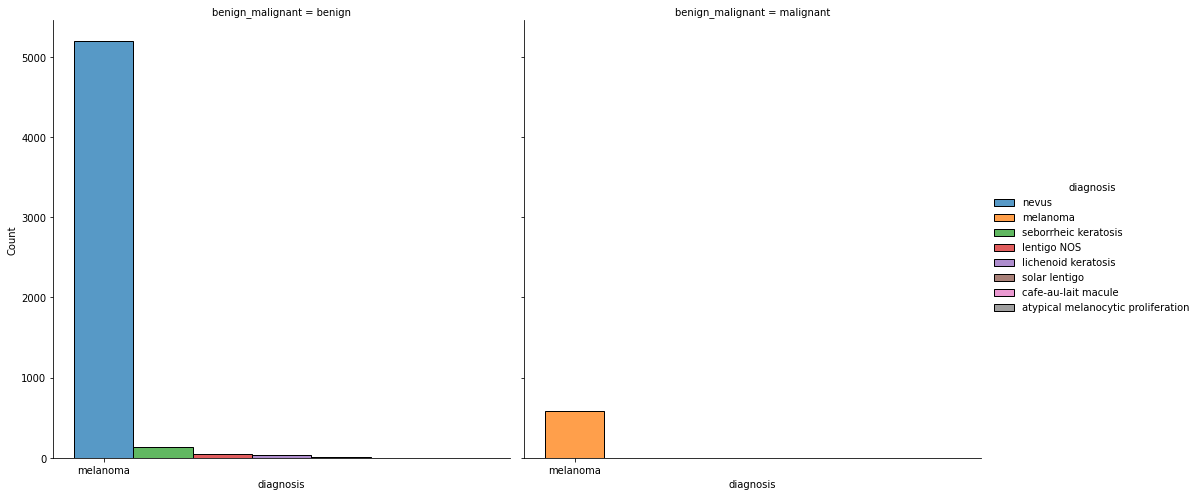

In [ ]:
new_diag= train[train['diagnosis'] != 'unknown']
g2 = sns.FacetGrid(new_diag, col="benign_malignant", hue="diagnosis",height=7)
g2.map(sns.histplot, "diagnosis")
g2.add_legend()
## More clarification
train_malignant  = train[train["target"] == 1]
print ("Malignant_diagnosis")
print(train_malignant["diagnosis"].value_counts())
train_begnin  = train[train["target"] == 0]
print ("Begnin_diagnosis")
print(train_begnin["diagnosis"].value_counts())
# we can notice that all malignant cases are diagonised as Melanomia while most cases in benign are unknown then nevus

## Dealing with missing values


In [ ]:
# Sex column: we see before that male is dominant so we fill the missing values by 'male'
train["sex"].fillna("male", inplace = True)
# Age column: we will fill it with the median age of the most dominant sites if the gender is male
sites= ["torso", "upper extremity", "lower extremity"]
new_df= train[(train["sex"] == "male") & (train["anatom_site_general_challenge"].isin(sites))]
median_age = new_df["age_approx"].median()
train["age_approx"].fillna(median_age, inplace = True)
# anatom_site_general_challenge column: we will fill the missing values both in train and test with 'torso' because it is the dominator
train["anatom_site_general_challenge"].fillna("torso", inplace = True)
test["anatom_site_general_challenge"].fillna("torso", inplace = True)

In [ ]:
# Now there is no missing values in each column in train set
train.isna().sum()

image_name                       0
patient_id                       0
sex                              0
age_approx                       0
anatom_site_general_challenge    0
diagnosis                        0
benign_malignant                 0
target                           0
tfrecord                         0
width                            0
height                           0
dtype: int64

In [ ]:
# Also there is no missing values in each column in test set
test.isna().sum()

image_name                       0
patient_id                       0
sex                              0
age_approx                       0
anatom_site_general_challenge    0
width                            0
height                           0
dtype: int64

## EDA in images

In [ ]:
#we can see image statistics datasets in https://www.kaggle.com/datasets/fireheart7/melanoma-image-insights?select=melanoma_image_statistics_compiled_01
# we can download them to take insight look at our images
!kaggle datasets download -d fireheart7/melanoma-image-insights


  0% 0.00/3.32M [00:00<?, ?B/s]
100% 3.32M/3.32M [00:00<00:00, 129MB/s]


In [ ]:
! mkdir stats_dataset
! unzip melanoma-image-insights.zip -d stats_dataset

Archive:  melanoma-image-insights.zip
  inflating: stats_dataset/melanoma_image_statistics_compiled_01  
  inflating: stats_dataset/melanoma_image_statistics_compiled_02  
  inflating: stats_dataset/melanoma_image_statistics_compiled_03  
  inflating: stats_dataset/melanoma_image_statistics_compiled_04  
  inflating: stats_dataset/melanoma_image_statistics_compiled_05  
  inflating: stats_dataset/melanoma_image_statistics_compiled_06  
  inflating: stats_dataset/melanoma_image_statistics_compiled_test_01  
  inflating: stats_dataset/melanoma_image_statistics_compiled_test_02  
  inflating: stats_dataset/siim-isic-train-path-target.csv  
  inflating: stats_dataset/updated_test_file  
  inflating: stats_dataset/updated_training_file  


In [ ]:
train_stats_1 = pd.DataFrame(pd.read_csv("/content/stats_dataset/melanoma_image_statistics_compiled_01"))
train_stats_2 = pd.DataFrame(pd.read_csv("/content/stats_dataset/melanoma_image_statistics_compiled_02"))
train_stats_3 = pd.DataFrame(pd.read_csv("/content/stats_dataset/melanoma_image_statistics_compiled_03"))
train_stats_4 = pd.DataFrame(pd.read_csv("/content/stats_dataset/melanoma_image_statistics_compiled_04"))
train_stats_5 = pd.DataFrame(pd.read_csv("/content/stats_dataset/melanoma_image_statistics_compiled_05"))
train_stats_6 = pd.DataFrame(pd.read_csv("/content/stats_dataset/melanoma_image_statistics_compiled_06"))
train_statistics = pd.concat([train_stats_1, train_stats_2, train_stats_3,
                                   train_stats_4, train_stats_5, train_stats_6],
                                  ignore_index = True)

In [ ]:
test_stats_1 = pd.DataFrame(pd.read_csv("/content/stats_dataset/melanoma_image_statistics_compiled_test_01"))
test_stats_2 = pd.DataFrame(pd.read_csv("/content/stats_dataset/melanoma_image_statistics_compiled_test_02"))
test_statistics = pd.concat([test_stats_1, test_stats_2], ignore_index = True)

In [ ]:
# Explore the dataset
print(train_statistics.columns)
train_statistics.head()

Index(['image_name', 'path', 'rows', 'columns', 'channels', 'image_mean',
       'image_standard_deviation', 'image_skewness', 'mean_red_value',
       'mean_green_value', 'mean_blue_value'],
      dtype='object')


,image_name,path,rows,columns,channels,image_mean,image_standard_deviation,image_skewness,mean_red_value,mean_green_value,mean_blue_value
0,ISIC_2637011.jpg,/kaggle/input/siim-isic-melanoma-classificatio...,4000,6000,3,169.862452,41.270046,-0.129492,212.933646,138.914514,157.739197
1,ISIC_0015719.jpg,/kaggle/input/siim-isic-melanoma-classificatio...,4000,6000,3,171.084778,41.994142,-0.205430,217.279705,165.095320,130.879309
2,ISIC_0052212.jpg,/kaggle/input/siim-isic-melanoma-classificatio...,1053,1872,3,158.691048,37.364873,-0.551454,199.940391,130.224750,145.908002
3,ISIC_0068279.jpg,/kaggle/input/siim-isic-melanoma-classificatio...,1053,1872,3,80.342856,44.885518,0.453018,119.689502,62.614801,58.724265
4,ISIC_0074268.jpg,/kaggle/input/siim-isic-melanoma-classificatio...,4000,6000,3,183.955453,37.497829,-0.157002,226.269270,173.175601,152.421488


In [ ]:
from tqdm import tqdm_notebook as tqdm

In [ ]:
begnin_skewness= []
malignant_skewness= []

benign_mean_red_value = []
benign_mean_green_value = []
benign_mean_blue_value = []

malignant_mean_red_value = []
malignant_mean_green_value = []
malignant_mean_blue_value = []


for image_name in tqdm(train_statistics["image_name"]) : 
    name = image_name[0:len(image_name)-4] # as .jpg are the appended at the end of the name
    extracted_section = train[train["image_name"] == name]
    s = int(train_statistics[train_statistics["image_name"] == image_name]["image_skewness"])
    r = int(train_statistics[train_statistics["image_name"] == image_name]["mean_red_value"])
    g = int(train_statistics[train_statistics["image_name"] == image_name]["mean_green_value"])
    b = int(train_statistics[train_statistics["image_name"] == image_name]["mean_blue_value"])
    if int(extracted_section["target"]) == 0 : # benign
        begnin_skewness.append(s)
        benign_mean_red_value.append(r)
        benign_mean_green_value.append(g)
        benign_mean_blue_value.append(b)
    else:
        malignant_skewness.append(s)
        malignant_mean_red_value.append(r)
        malignant_mean_green_value.append(g)
        malignant_mean_blue_value.append(b)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


  0%|          | 0/33126 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


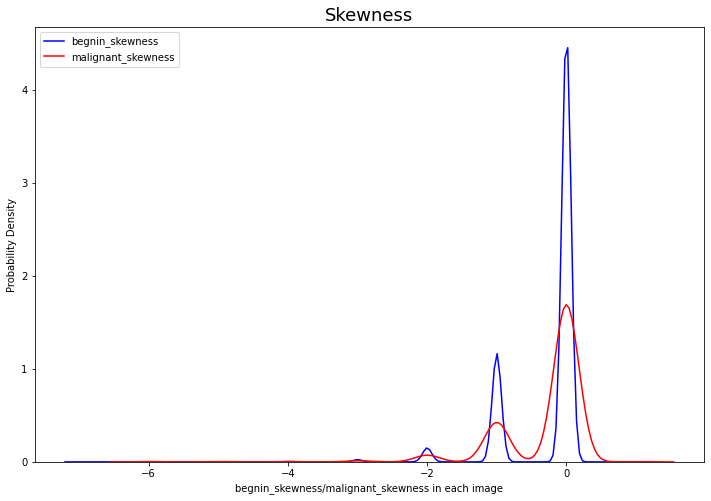

In [ ]:
plt.figure(figsize = (12, 8))
fig = sns.distplot(begnin_skewness, hist = False, kde = True, label = "begnin_skewness", color = "b")
fig = sns.distplot(malignant_skewness, hist = False, kde = True, label = "malignant_skewness", color = "r")
fig.set(xlabel = "begnin_skewness/malignant_skewness in each image",
        ylabel = "Probability Density")
plt.title("Skewness", fontsize = 18)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

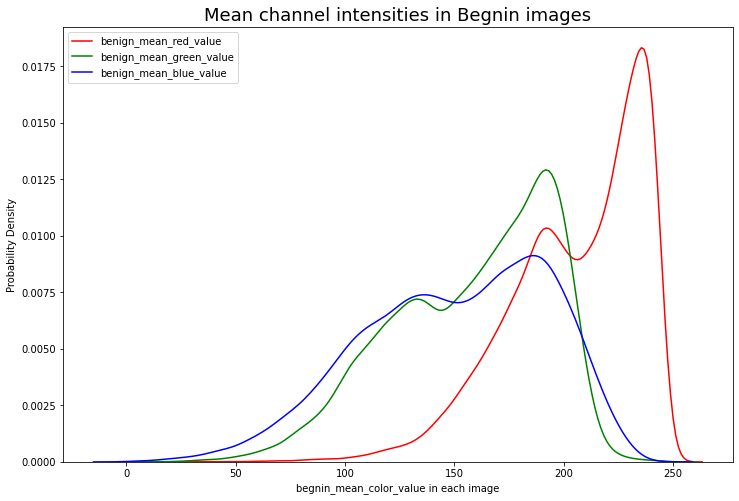

In [ ]:
plt.figure(figsize = (12, 8))
fig = sns.distplot(benign_mean_red_value, hist = False, kde = True, label = "benign_mean_red_value", color = "r")
fig = sns.distplot(benign_mean_green_value, hist = False, kde = True, label = "benign_mean_green_value", color = "g")
fig = sns.distplot(benign_mean_blue_value, hist = False, kde = True, label = "benign_mean_blue_value", color = "b")
fig.set(xlabel = "begnin_mean_color_value in each image",
        ylabel = "Probability Density")
plt.title("Mean channel intensities in Begnin images", fontsize = 18)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

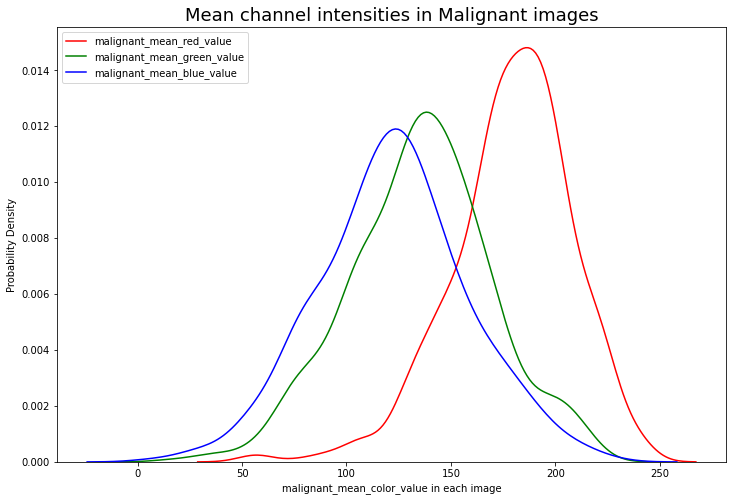

In [ ]:
plt.figure(figsize = (12, 8))
fig = sns.distplot(malignant_mean_red_value, hist = False, kde = True, label = "malignant_mean_red_value", color = "r")
fig = sns.distplot(malignant_mean_green_value, hist = False, kde = True, label = "malignant_mean_green_value", color = "g")
fig = sns.distplot(malignant_mean_blue_value, hist = False, kde = True, label = "malignant_mean_blue_value", color = "b")
fig.set(xlabel = "malignant_mean_color_value in each image",
        ylabel = "Probability Density")
plt.title("Mean channel intensities in Malignant images", fontsize = 18)
plt.legend()

#Conclusion

* We can notice from the previous figures that Red channel distribution in Begnin images is a bit negatively skewed more than Malignant images.

* There is noe skewness in Blue/green channels in malignant cases while they are negatively skewed in Begnin cases.
* in both figures,red spikes are the most, whereas Blue and Green are close to each other.